In [1]:
import cv2 as cv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import random
%matplotlib inline

In [2]:
def show_img(img):
    fig = plt.figure(figsize=(18, 16), dpi = 80, facecolor='w', edgecolor='k')
    plt.imshow(img)

In [3]:
def blur_img(img, blur_level):
    h, w = img.shape
    rw, rh = math.floor(w/blur_level), math.floor(h/blur_level)
    img_resized = cv.resize(img, (rw, rh))
    img_blured = cv.resize(img_resized, (w, h))
    return img_blured

In [4]:
def sub_img(img, wsub, hsub):
    blur_pieces = []
    h, w = img.shape
    wsubsize, hsubsize = math.floor(w/wsub), math.floor(h/hsub)
    for i in range(hsub-1):
        for j in range(wsub-1):
            blur_pieces.append(img[hsubsize*i:hsubsize*(i+1), wsubsize*j:wsubsize*(j+1)])
    return blur_pieces

In [5]:
def to_binary(img):
    thresh, im = cv.threshold(img, 170,255, cv.THRESH_BINARY );
    return im

### Load Data

In [23]:
import glob

training_path = './data/Book/'
training_data = []
img_set, blur_set = [], []
for filename in glob.glob(training_path+'/*.jpg'):
    im = cv.imread(filename, 0)
    w, h = im.shape
    im = cv.resize(im, (math.floor(h/3), math.floor(w/3)))
    im = sub_img(im, 72, 96)
    img_set += im
random.shuffle(img_set)

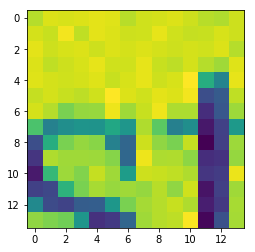

In [50]:
pick_random = random.randrange(len(img_set))
plt.imshow(img_set[pick_random])

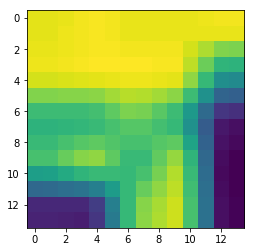

In [51]:
test = blur_img(img_set[pick_random], blur_level=1.8+random.random())
plt.imshow(test)

In [52]:
print('Number of images:', len(img_set), 'Size:', img_set[0].shape)

Number of images: 269800 Size: (14, 14)


### Building Model

Placeholders

In [61]:
IMGSIZE = 14*14
print(IMGSIZE)
data_ph = tf.placeholder('float32',[None, IMGSIZE])
output_ph = tf.placeholder('float32',[None, IMGSIZE])
learning_rate = tf.placeholder('float', [], name = 'learning_rate_ph')

196


Weights

In [62]:
weights = {
    'hl1':tf.Variable(tf.random_normal([IMGSIZE, 176])),
    'hl2':tf.Variable(tf.random_normal([176, 176])),
    'hl3':tf.Variable(tf.random_normal([176, 176])),
    'ol':tf.Variable(tf.random_normal([176, IMGSIZE]))
}

Biases

In [63]:
biases = {
    'hl1': tf.Variable(tf.random_normal([176])),
    'hl2': tf.Variable(tf.random_normal([176])),
    'hl3': tf.Variable(tf.random_normal([176])),
    'ol': tf.Variable(tf.random_normal([IMGSIZE]))
}

Layers

In [64]:
hl1 = tf.nn.sigmoid(tf.add(tf.matmul(data_ph, weights['hl1']), biases['hl1']), name = 'hl1')
hl2 = tf.nn.sigmoid(tf.add(tf.matmul(hl1, weights['hl2']), biases['hl2']), name = 'hl2')
hl3 = tf.nn.sigmoid(tf.add(tf.matmul(hl2, weights['hl3']), biases['hl3']), name = 'hl3')
ol = tf.nn.sigmoid(tf.add(tf.matmul(hl1, weights['ol']), biases['ol']), name = 'ol')*255

loss = tf.reduce_mean((ol - output_ph)**2, name = 'loss')
train = tf.train.AdamOptimizer(learning_rate).minimize(loss)

Load Batch

In [76]:
def load_batch(size, blur):
    batch_x, batch_y = [], []
    for _ in range(size):
        rand_val = random.randrange(0, len(img_set))
        if blur:
            batch_x.append(np.array(blur_img(img_set[rand_val], blur_level=3+random.random())).ravel())
        else:
            batch_x.append(np.array(img_set[rand_val]).ravel())
        batch_y.append(np.array(img_set[rand_val]).ravel())
    return batch_x, batch_y

Running session

In [77]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

15816.3
12660.5
9123.91
6590.25
5668.05
5490.35
5117.08
4682.84
4472.95
4175.09
4614.31
4577.6
4408.38
4507.75
4191.02
4537.53
3997.8
4125.63
3786.36
4301.95
3885.6
3891.27
3905.25
4076.3
3909.64
4251.92
4111.48
4022.8
4350.62
4167.72
4005.24
3705.82
4292.44
4268.91
3736.35
4061.59
4162.46
3763.79
4003.9
4117.0
4141.5
4137.88
3852.12
3661.67
3773.04
4320.96
3914.65
4035.7
3778.2
3937.87
4160.8
3695.07
3891.22
3901.89
3866.23
3702.15
3841.98
3896.28
3837.35
3715.86
3472.45
3684.64
3454.86
3269.72
3585.84
3431.44
3121.43
3474.2
3417.94
3919.18
3369.03
3344.84
3360.8
3105.6
3667.88
3609.24
3297.22
3552.02
2953.91
2965.85
3254.65
3667.18
3152.17
3203.27
3182.58
3131.13
3544.61
3571.03
3293.15
3652.06
3350.96
3435.39
3309.85
3095.18
2887.74
3479.25
3121.09
3185.04
3413.1
3410.96
3118.12
3044.7
3056.84
3158.44
3225.02
3310.89
3344.66
3068.46
3167.5
3250.97
3274.42
3363.53
3476.64
3741.86
3358.04
3284.44
3582.44
3617.75
3505.27
3204.54
2968.55
3038.06
3186.15
3073.98
3202.0
2831.29
3025.08
27

1099.18
1271.33
1176.88
1220.2
1152.86
1530.65
1263.23
1771.9
1237.64
1410.08
1313.89
1144.65
1436.93
1572.69
1066.26
1353.82
1187.35
1261.55
1280.04
1321.43
1483.23
1296.01
1368.65
1583.62
1071.11
1126.96
1348.87
1661.25
1528.99
1312.6
1520.22
1702.86
1507.95
1593.84
1202.25
1325.85
1308.35
1195.57
1609.03
1363.73
1506.37
1334.95
1193.62
1238.8
1466.63
1346.05
1354.53
1568.17
1393.02
1227.18
1325.93
1255.32
1541.82
1376.38
1293.93
1249.18
1357.84
977.388
1362.71
1227.18
1781.54
1207.96
1482.28
1308.47
1500.91
1451.66
1130.79
1085.18
1266.89
1323.83
1452.54
1719.2
1803.41
1124.35
1352.35
1714.62
1219.77
1517.87
1280.54
1453.79
1169.3
1203.48
1241.94
1426.17
1879.55
1337.15
1466.84
1613.6
1252.62
1302.11
1166.08
1586.77
1601.89
1408.97
1370.71
1457.97
1396.23
1585.43
1255.33
1333.06
1637.64
1587.09
1909.73
1382.37
1071.97
1162.28
1128.71
1435.48
1621.46
1401.35
1285.81
932.832
1024.5
1105.84
1389.86
1139.98
1048.12
1363.13
1604.73
1369.65
1458.17
1357.94
1436.58
1562.56
1072.69
1153.56


1065.5
1407.49
1450.04
1243.76
1140.95
1289.88
1176.94
1340.21
1681.91
1173.12
1140.02
1442.73
1064.19
1422.76
1228.05
1216.36
1218.22
1676.88
1587.33
1004.91
1353.94
1431.25
1334.25
1346.86
1572.82
1142.44
1299.67
1462.24
1004.86
1248.6
1232.48
1180.04
1108.47
1084.34
1291.91
1193.8
1074.46
1064.83
1229.09
1269.22
1410.36
1165.41
1221.76
1119.41
1384.5
1270.74
1481.14
1103.97
1332.83
1544.14
1100.0
1407.78
1120.8
1340.9
1332.66
1474.71
1350.36
1273.41
1407.96
1052.41
1395.32
984.574
1471.39
1059.02
1472.02
1053.25
1192.04
1408.13
1332.51
1373.83
1392.23
1116.03
1308.38
1139.59
1148.43
1287.19
1174.4
1244.42
1134.97
1710.89
1252.08
1327.65
1273.37
1652.29
1315.42
1163.34
1312.1
1175.41
1313.52
1773.2
1152.73
1437.96
1249.12
1278.83
1342.42
1365.6
1219.1
1255.86
1497.99
1411.85
1362.06
1367.39
1414.5
1371.67
1204.18
1124.88
1358.14
1397.54
1169.99
981.124
1384.23
1311.32
1030.14
1119.53
1029.06
1024.89
1172.62
1308.73
1362.84
992.937
1494.33
1121.47
1135.67
1015.52
1240.96
1220.57
1317.

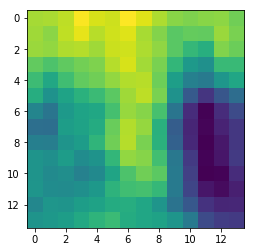

In [82]:
import time

start = time.time()
batch_size = 100
steps = 300000
with tf.Session() as sess:
    sess.run(init)
    for i in range(steps):
        batch_x, batch_y = load_batch(batch_size, blur=False)
        feed = {data_ph:batch_x, output_ph:batch_y, learning_rate:3e-4}
        sess.run(train, feed_dict=feed)
        
        if i%100 == 0:
            print(sess.run(loss, feed_dict = feed))
            pred = sess.run(ol, feed_dict={data_ph:[np.array(blur_img(img_set[pick_random], blur_level=3+random.random())).ravel()]})
            plt.imshow(np.reshape(pred, [14, 14]))
end = time.time()
elapsed = end - start
print(elapsed)

In [22]:
time.strftime("%H:%M:%S", time.gmtime(elapsed))

'00:00:22'

In [18]:
%matplotlib inline
# plt.imshow(np.reshape(pred, [63, 108]))
with tf.Session as sess:
    pred = sess.run(ol, feed_dict={data_ph:[np.array(blur_img(img_set[1], blur_level=3+random.random())).ravel()]})
    plt.imshow(np.reshape(pred, [42, 42]))

AttributeError: __exit__